In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
from read_results import read_varnames
import strato_code.kpp4py as kpp

In [3]:
nvar = 34
varnames = read_varnames("strato_code/strato_Parameters.f90")[0:nvar]
print(varnames)

['CH3', 'Cl2', 'Cl2O2', 'ClOO', 'OClO', 'BrCl', 'HOBr', 'BrONO2', 'HCO', 'CH3O', 'O1D', 'N2O5', 'HBr', 'CH3OOH', 'HNO4', 'HCl', 'H2O2', 'HOCl', 'HNO3', 'H', 'CH3O2', 'ClONO2', 'NO3', 'CH2O', 'Br', 'OH', 'Cl', 'ClO', 'O3', 'NO', 'BrO', 'O', 'HO2', 'NO2']


In [4]:
df_range = pd.read_csv('strato_range.csv', index_col=0)
df_range['mid'] = 0.5*(df_range['min']+df_range['max'])
df_range.head(10)

,min,max,mid
CH3,3.685817e-06,3.234628e+00,1.617316e+00
Cl2,6.685439e+03,1.245632e+05,6.562433e+04
Cl2O2,2.478591e+03,2.227402e+04,1.237631e+04
ClOO,3.769876e-04,2.320970e+02,1.160487e+02
OClO,5.689835e+03,2.060717e+06,1.033203e+06
BrCl,4.626044e+03,3.018356e+05,1.532308e+05
HOBr,3.703886e+05,8.473285e+05,6.088586e+05
BrONO2,7.216404e+03,5.382783e+05,2.727474e+05
HCO,3.274070e-08,2.464155e-02,1.232079e-02
CH3O,1.000000e-08,2.027971e+02,1.013985e+02


In [5]:
y0 = np.append(df_range['mid'], 0.5)
#y0 = np.random.uniform(np.append(df_range['min'], 0), np.append(df_range['max'], 1))

y0.shape

(35,)

In [6]:
f0 = kpp.onestep(y0.T).T
f0.shape

(1, 34)

In [7]:
y_perturb = np.empty([35, 35])
y_perturb[:] = y0
for i in range(35):
    y_perturb[i, i] *= 1.1

In [8]:
f = kpp.onestep(y_perturb.T).T
f.shape

(35, 34)

In [9]:
A = f/f0 # sensitivity matrix

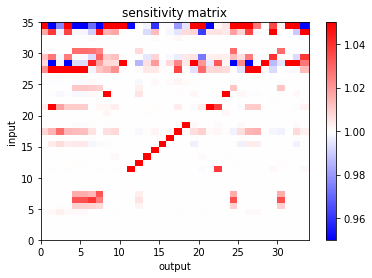

In [10]:
plt.pcolormesh(A, cmap='bwr', vmin=0.95, vmax=1.05)
plt.colorbar()
plt.ylabel('input')
plt.xlabel('output')
plt.title('sensitivity matrix')

In [11]:
for thres in [0.01, 0.02, 0.05]:
    print(thres, (np.abs(A - 1.0) > thres).sum(axis=0))

0.01 [4 7 4 6 8 7 6 8 5 4 2 2 2 1 4 1 1 4 1 2 5 2 3 1 8 2 6 4 1 4 4 2 3 5]
0.02 [2 6 3 5 4 4 4 6 2 2 2 2 1 1 2 1 1 3 1 2 5 2 3 1 4 2 5 2 1 3 2 2 2 4]
0.05 [1 4 1 3 2 2 0 1 2 1 2 1 1 1 1 1 1 1 1 2 1 2 0 1 2 1 3 1 1 1 0 2 2 2]
